# Hierarchal Clustering Implementation

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets

In [3]:
iris=datasets.load_iris()

In [4]:
iris_data=pd.DataFrame(iris.data)

In [5]:
iris_data.colums=iris.feature_names

C:\Users\nusra\AppData\Local\Temp\ipykernel_12988\3876949469.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  iris_data.colums=iris.feature_names


In [6]:
iris_data

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


# ------------------------------------------------------

In [7]:
#standardization 
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [8]:
X_scaled=scaler.fit_transform(iris_data)

In [9]:
X_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [10]:
X_scaled.shape

(150, 4)

In [14]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)

pca_scaled=pca.fit_transform(X_scaled)

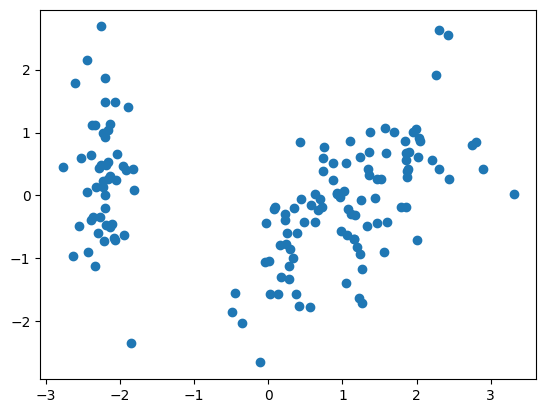

In [15]:
plt.scatter(pca_scaled[:,0], pca_scaled[:,1])

# --------------------------------------------------

In [16]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

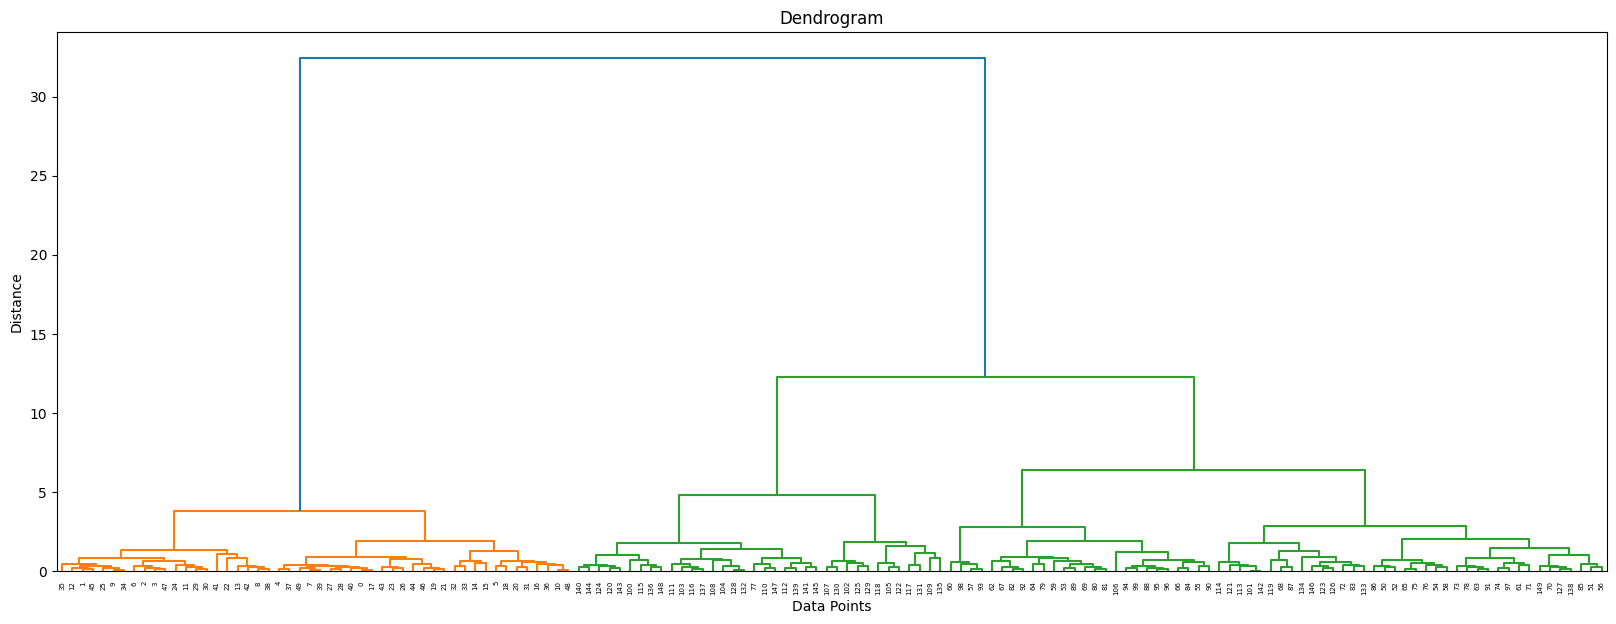

In [18]:
# Step 2: Create dendrogram (optional, just for visualization)
plt.figure(figsize=(20, 7))
dendrogram = sch.dendrogram(sch.linkage(iris_data, method='ward'))
plt.title("Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

In [43]:
hc = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward') # fix
hc.fit(iris_data)

AgglomerativeClustering()

In [44]:
hc.fit_predict(iris_data)
#hc.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

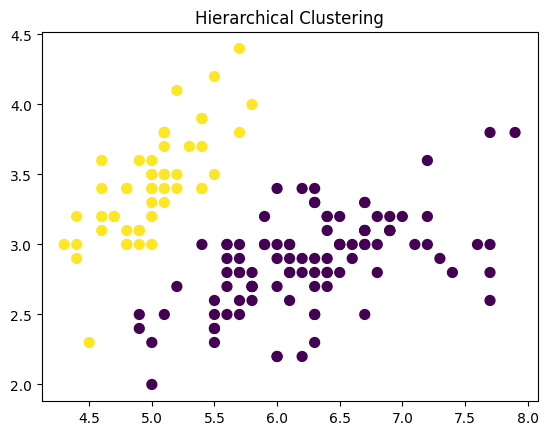

In [45]:
# Step 4: Plot clusters
plt.scatter(iris_data.iloc[:,0], iris_data.iloc[:,1], c=hc.labels_, cmap='viridis', s=50)
plt.title("Hierarchical Clustering")
plt.show()

In [54]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
k_range = range(2, 11)  # silhouette score is undefined for k=1

for k in k_range:
    agg = AgglomerativeClustering(n_clusters=k, linkage='ward')  # Don't include metric
    labels = agg.fit_predict(iris_data)  # Get cluster labels
    score = silhouette_score(iris_data, labels)
    silhouette_scores.append(score)

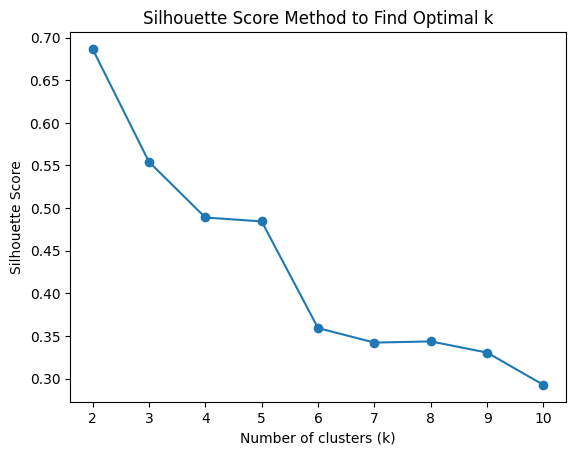

In [55]:
# Plot silhouette scores
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method to Find Optimal k')
plt.show()